In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

import os
import zipfile

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2022-05-20 05:43:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.201.144, 216.58.209.144, 142.250.180.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.201.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: 'cats_and_dogs_filtered.zip'

     0K .......... .......... .......... .......... ..........  0% 64.2K 17m23s
    50K .......... .......... .......... .......... ..........  0%  210K 11m20s
   100K .......... .......... .......... .......... ..........  0% 7.06K 60m8s
   150K .......... .......... .......... .......... ..........  0% 67.9K 49m10s
   200K .......... .......... .......... .......... ..........  0% 77.2K 42m11s
   250K .......... .......... .......... .......... ..........  0% 62.7K 38m5s
   300K .......... .......... .......... .......... ..........  0% 54.5M 32m37s
   3

  6000K .......... .......... .......... .......... ..........  9%  132K 33m25s
  6050K .......... .......... .......... .......... ..........  9% 71.6K 33m14s
  6100K .......... .......... .......... .......... ..........  9% 59.4K 33m5s
  6150K .......... .......... .......... .......... ..........  9%  140K 32m51s
  6200K .......... .......... .......... .......... ..........  9% 84.1K 32m39s
  6250K .......... .......... .......... .......... ..........  9% 68.4K 32m29s
  6300K .......... .......... .......... .......... ..........  9% 64.5K 32m19s
  6350K .......... .......... .......... .......... ..........  9% 92.1K 32m8s
  6400K .......... .......... .......... .......... ..........  9%  101K 31m56s
  6450K .......... .......... .......... .......... ..........  9% 63.7K 31m47s
  6500K .......... .......... .......... .......... ..........  9%  129K 31m34s
  6550K .......... .......... .......... .......... ..........  9% 66.2K 31m25s
  6600K .......... .......... .......... .

In [3]:
# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [6]:
base_dir = 'cats_and_dogs_filtered'
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [7]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
# check what filenames look like
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [10]:
# check total numbers of cat and dogs images 
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [16]:
# plot some cat and dog datasets

# parameters for our graph, we'll output images in a 4x4 configurations
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

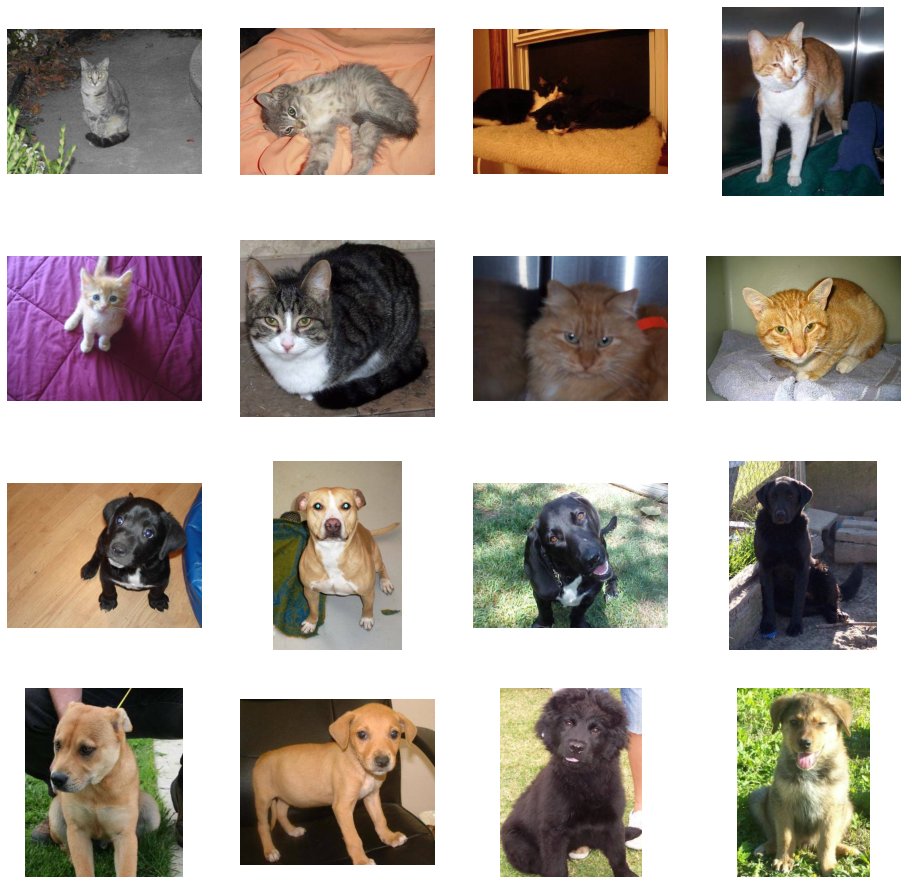

In [19]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()
    

# Building a Model from Scratch

In [21]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150x3
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron.
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [22]:
# Review the architecture of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [29]:
# we will use the rmsprop optimizer with a learning rate of 0.001
# we will train our model with the binary_crossentropy loss, because it's a binary classification
model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])


# Data Preprocessing

In [27]:
# rescaled the images
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale= 1.0/255.)

# This ImageDataGenerator class allows you to instantiate generators of augmented image batches
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [30]:
history = model.fit(train_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_data=validation_generator,
                   validation_steps=50,
                   verbose=2)

Epoch 1/15
100/100 - 47s - loss: 0.8480 - accuracy: 0.5225 - val_loss: 0.6804 - val_accuracy: 0.5640
Epoch 2/15
100/100 - 34s - loss: 0.6863 - accuracy: 0.6090 - val_loss: 0.6033 - val_accuracy: 0.6660
Epoch 3/15
100/100 - 38s - loss: 0.6088 - accuracy: 0.6905 - val_loss: 0.5655 - val_accuracy: 0.7050
Epoch 4/15
100/100 - 33s - loss: 0.5296 - accuracy: 0.7385 - val_loss: 0.5544 - val_accuracy: 0.7070
Epoch 5/15
100/100 - 33s - loss: 0.4525 - accuracy: 0.7890 - val_loss: 0.5339 - val_accuracy: 0.7370
Epoch 6/15
100/100 - 34s - loss: 0.3372 - accuracy: 0.8565 - val_loss: 0.6265 - val_accuracy: 0.7080
Epoch 7/15
100/100 - 33s - loss: 0.2360 - accuracy: 0.9030 - val_loss: 0.7122 - val_accuracy: 0.7050
Epoch 8/15
100/100 - 33s - loss: 0.1184 - accuracy: 0.9555 - val_loss: 0.9573 - val_accuracy: 0.7170
Epoch 9/15
100/100 - 34s - loss: 0.0899 - accuracy: 0.9705 - val_loss: 1.0289 - val_accuracy: 0.7330
Epoch 10/15
100/100 - 34s - loss: 0.2119 - accuracy: 0.9715 - val_loss: 1.2032 - val_accura

# Model Prediction

In [42]:
images = os.listdir("./tmp/images")

for i in images:
    # Prediction images
    path = './tmp/images/' + i
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    
    if classes[0]>0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")

[0.00020325]
cats_1.jpg is a cat
[1.]
dog_1.jpg is a dog


C:\Users\Lemi Debele\AppData\Local\Temp/ipykernel_21360/1822312938.py:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


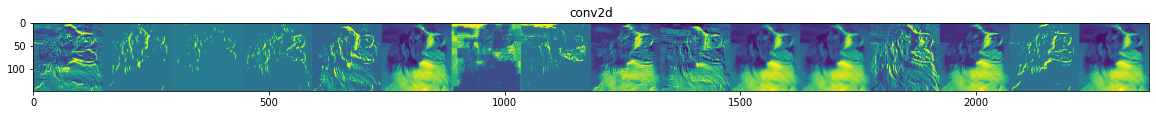

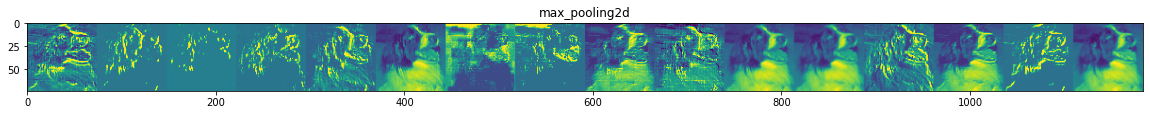

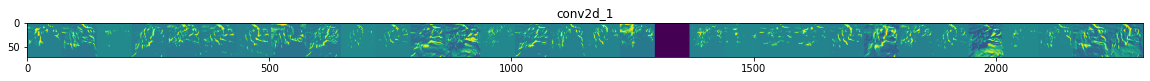

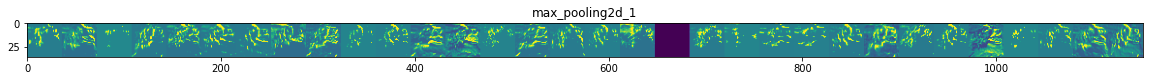

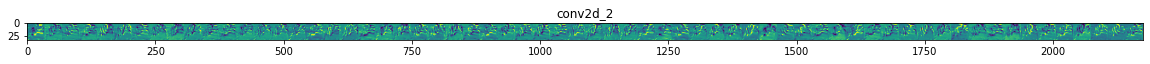

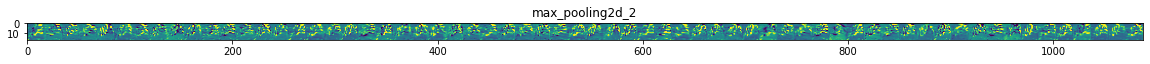

In [44]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Evaluating Accuracy and Loss for the model

Text(0.5, 1.0, 'Training and Validation loss')

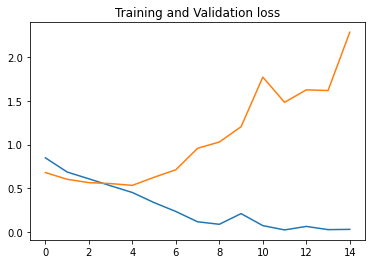

In [46]:
# Plot the training/validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation loss')